In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import platform
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/mnt/e/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

path = ds_path + 'AI Specialist Lesson 05'
os.chdir(ds_path)

if not os.path.isdir(path):
    import subprocess
    subprocess.run(["unrar", "x", "AI Specialist Lesson 05.rar"])

os.chdir(path)

In [107]:
# !pip install category-encoders

In [108]:
# !pip install imblearn --quiet

In [109]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [110]:
pd.set_option('display.max_columns', 100)

In [111]:
data = pd.read_csv("TelecomCustomerChurn.csv")
display(data.shape)
display(data.head())

(4250, 20)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [113]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [114]:
data.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [115]:
def draw_percent(total, axis):
    for p in axis.patches:
        percentage = "{:.1f}%".format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        axis.annotate(percentage, (x, y), ha="center")

In [116]:
cat_var = [feature for feature in data.columns if data[feature].dtypes == 'O']
cat_var

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

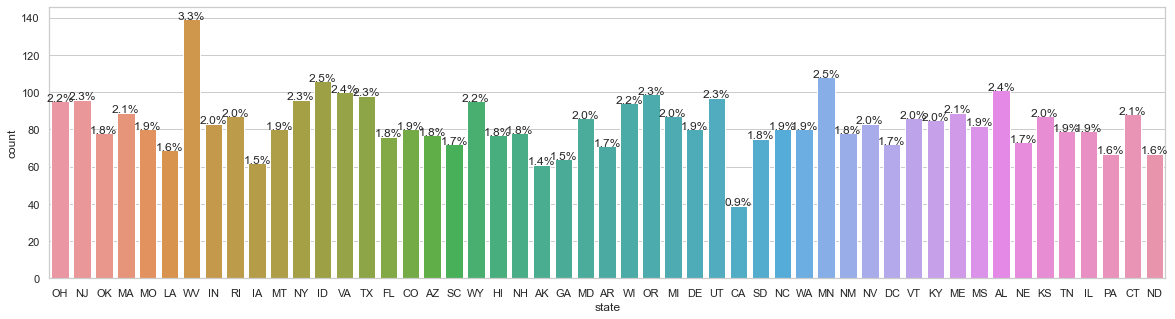

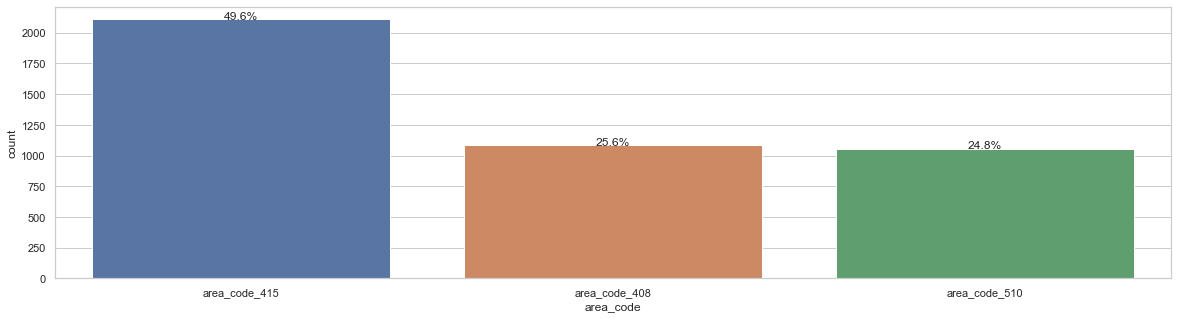

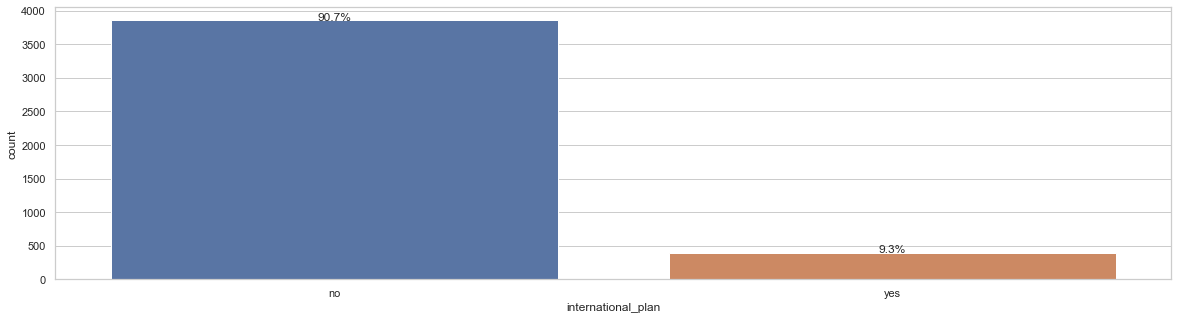

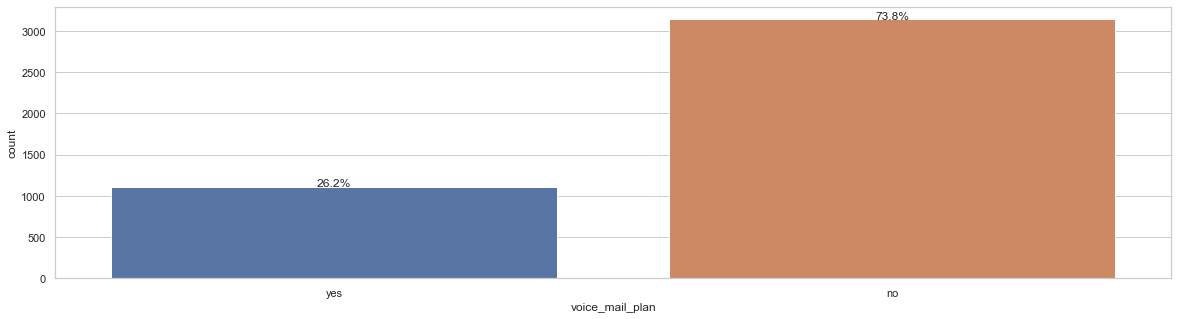

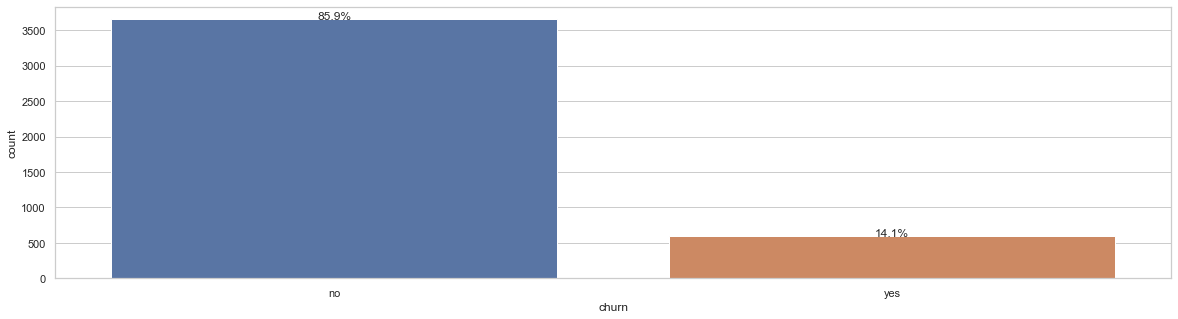

In [117]:
sns.set(style = "whitegrid")
for feature in cat_var:
    plt.figure(figsize=(20, 5))
    total = data.shape[0]
    ax = sns.countplot(x = data[feature], data=data)
    draw_percent(total, ax)
    plt.show()

In [118]:
num_var = [feature for feature in data.columns if data[feature].dtypes != 'object']
print(num_var)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


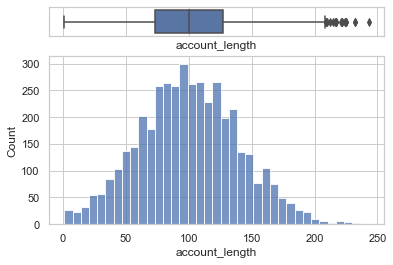

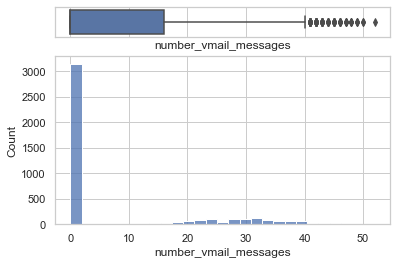

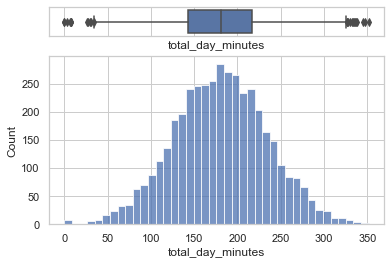

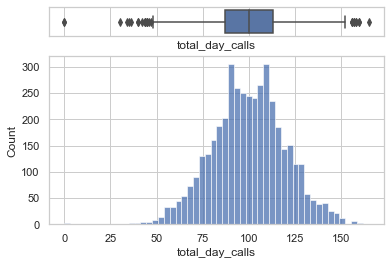

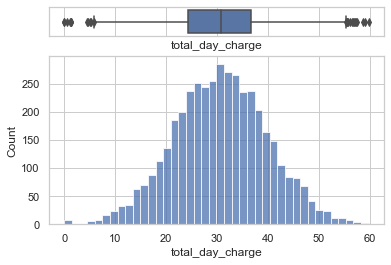

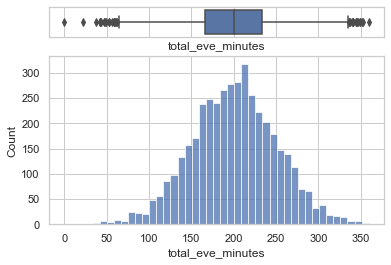

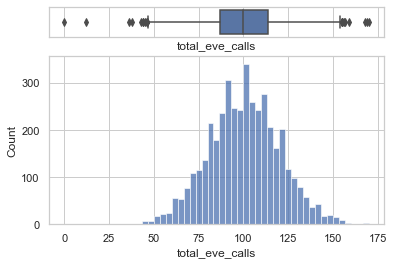

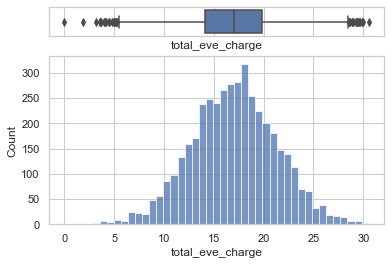

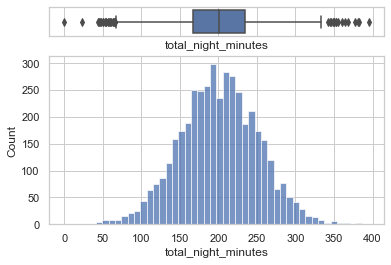

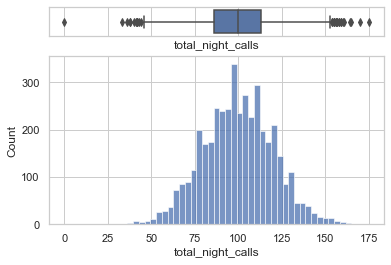

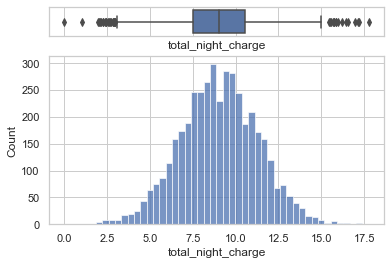

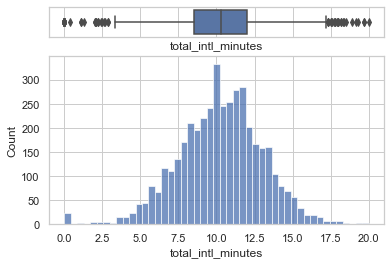

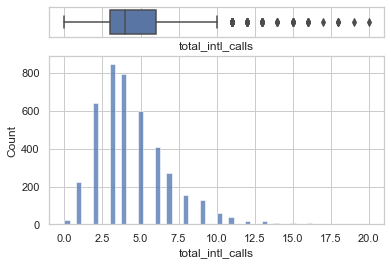

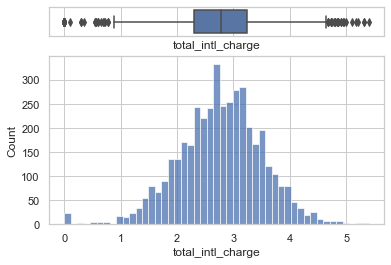

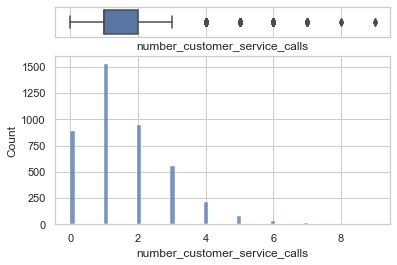

In [119]:
for feature in num_var:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)})
    sns.boxplot(data[feature], ax=ax_box)
    sns.histplot(data=data, x = feature, ax=ax_hist)
    plt.show()

In [120]:
target = "churn"
train = data.copy()

In [121]:
def IQR_OutlierDetector(data, feature, ConfParm=1.5):
    datavalues = data[feature]
    q1 = np.quantile(datavalues, 0.25)
    q3 = np.quantile(datavalues, 0.75)
    iqr = q3 - q1
    upper_bound = q3 + ConfParm * iqr
    lower_bound = q1 - ConfParm * iqr
    LowerOutlierData = [(idx, val) for idx, val in datavalues.items() if val < lower_bound]
    UpperOutlierData = [(idx, val) for idx, val in datavalues.items() if val > upper_bound]
    
    ConfRange = [lower_bound, upper_bound]
    
    return LowerOutlierData, UpperOutlierData, ConfRange

In [122]:
def IQR_OutlierAnalysis(data, feature, LowerOutlierData, UpperOutlierData, ConfRange, target):
    datavalues = data[feature]
    print(f"Confidence Range : {ConfRange}")
    print(f"Lower Outlier Data : {len(LowerOutlierData)}")
    print(LowerOutlierData)
    TargetLowerOutlierData = [data.loc[idx, target] for idx, val in LowerOutlierData]
    print(TargetLowerOutlierData)
    
    print(f"Upper Outlier Data : {len(UpperOutlierData)}")
    print(UpperOutlierData)
    TargetUpperOutlierData = [data.loc[idx, target] for idx, val in UpperOutlierData]
    print(TargetUpperOutlierData)


In [123]:
def IQR_OutlierVisualization(data, onefeature):
    datavalues = data[onefeature]
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.set_figheight(3)
    f.set_figwidth(15)
    sns.boxplot(datavalues, ax=ax_box)
    sns.histplot(data=data, x=onefeature, ax=ax_hist)
    plt.show()

In [124]:
def IQR_Impute_Noise(data, feature, LowerOutlierData, UpperOutlierData, ConfRange, target):
    df = data[(data[feature] >= ConfRange[0]) & (data[feature] <= ConfRange[1])]
    TargetDict = {val: np.median(df[df[target] == val][feature]) for val in df[target].unique()}
    for idx, val in LowerOutlierData:
        data.loc[idx, feature] = TargetDict[data.loc[idx, target]]
    
    for idx, val in UpperOutlierData:
        data.loc[idx, feature] = TargetDict[data.loc[idx, target]]
    
    return data[feature], TargetDict

Confidence Range : [-8.0, 208.0]
Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 20
[(197, 215), (256, 209), (343, 224), (684, 243), (877, 217), (1193, 232), (1304, 225), (1472, 225), (1593, 224), (1828, 212), (1923, 210), (1939, 217), (2289, 209), (2725, 221), (2736, 209), (3679, 216), (3711, 222), (3719, 232), (3932, 217), (4079, 222)]
['no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


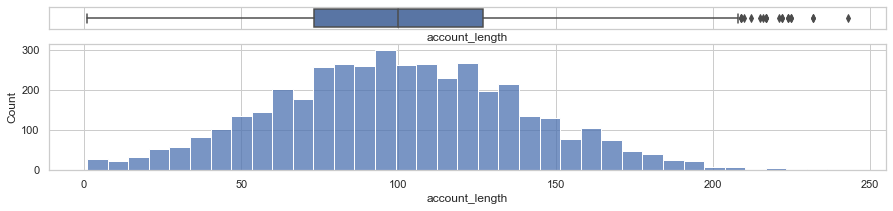

{'no': 99.0, 'yes': 101.0}


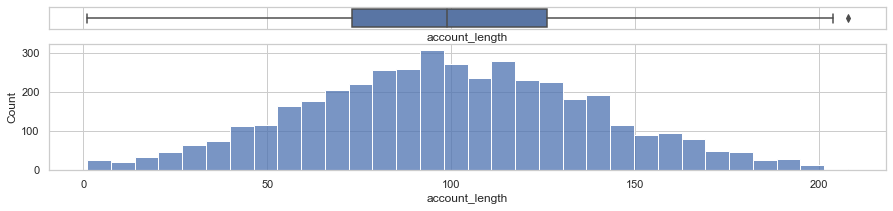

In [125]:
feature = "account_length"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [9.0, 49.0]
Lower Outlier Data : 5
[(1222, 8), (1680, 4), (2048, 8), (2852, 6), (3214, 6)]
['no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 3
[(2303, 50), (2443, 50), (4005, 52)]
['no', 'no', 'no']


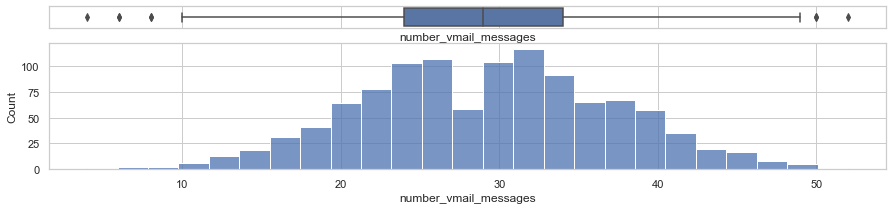

{'no': 29.0, 'yes': 31.0}


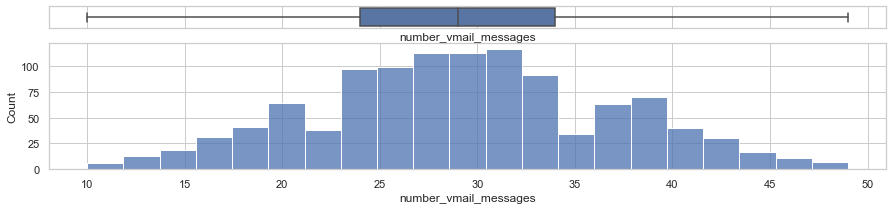

In [126]:
feature = "number_vmail_messages"
DataNoise = data[data[feature] != 0].copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [34.01250000000006, 325.51249999999993]
Lower Outlier Data : 12
[(570, 30.9), (618, 34.0), (900, 25.9), (1138, 0.0), (1183, 0.0), (1683, 7.9), (1805, 27.0), (2318, 2.6), (2332, 7.8), (2691, 29.9), (4157, 6.6), (4234, 7.2)]
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 13
[(12, 332.9), (129, 337.4), (162, 326.5), (500, 335.5), (817, 334.3), (827, 346.8), (1415, 329.8), (1717, 328.1), (2051, 326.3), (2202, 345.3), (2921, 338.4), (3381, 351.5), (3494, 332.1)]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


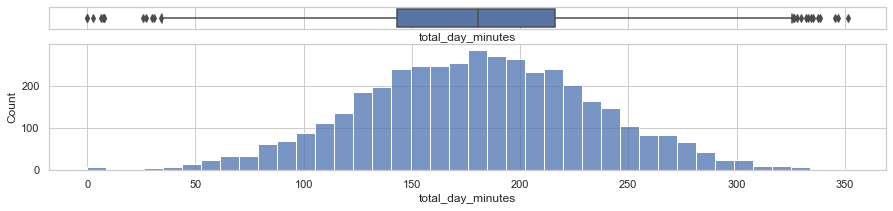

{'no': 178.4, 'yes': 217.05}


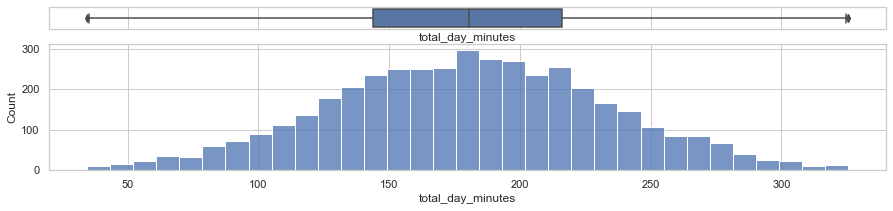

In [127]:
feature = "total_day_minutes"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [48.0, 152.0]
Lower Outlier Data : 18
[(119, 47), (575, 36), (617, 40), (960, 30), (1119, 42), (1138, 0), (1139, 45), (1183, 0), (1205, 45), (1686, 35), (2119, 45), (2441, 44), (2442, 44), (2509, 44), (2702, 40), (3434, 34), (3763, 44), (3780, 46)]
['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 10
[(262, 158), (887, 158), (942, 165), (1235, 160), (1578, 156), (2034, 157), (3579, 156), (3639, 156), (3649, 157), (3871, 160)]
['no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']


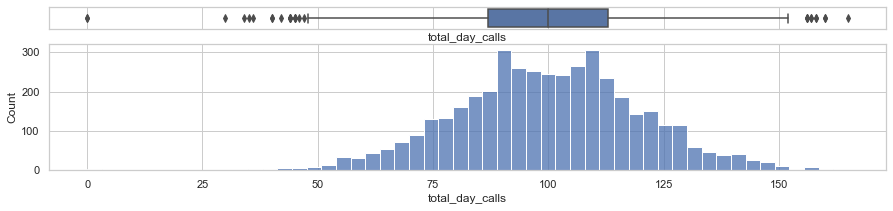

{'no': 100.0, 'yes': 101.0}


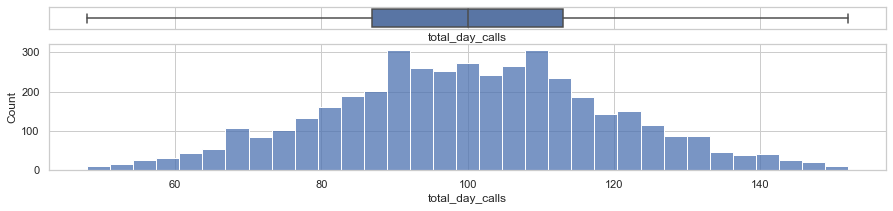

In [128]:
feature = "total_day_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [5.787499999999998, 55.3275]
Lower Outlier Data : 12
[(570, 5.25), (618, 5.78), (900, 4.4), (1138, 0.0), (1183, 0.0), (1683, 1.34), (1805, 4.59), (2318, 0.44), (2332, 1.33), (2691, 5.08), (4157, 1.12), (4234, 1.22)]
['no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 14
[(12, 56.59), (129, 57.36), (162, 55.51), (500, 57.04), (817, 56.83), (827, 58.96), (1415, 56.07), (1717, 55.78), (2051, 55.47), (2202, 58.7), (2921, 57.53), (3381, 59.76), (3494, 56.46), (3791, 55.34)]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


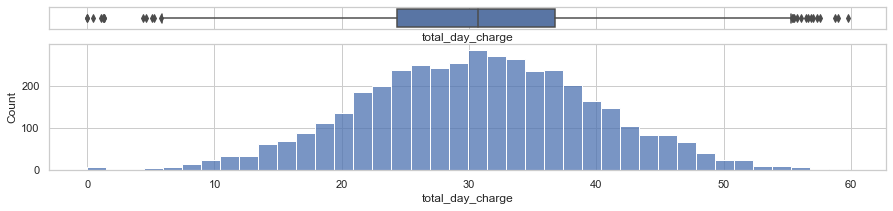

{'no': 30.33, 'yes': 36.87}


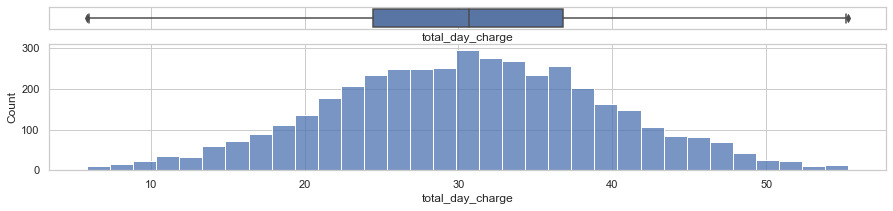

In [129]:
feature = "total_day_charge"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [64.15000000000002, 335.55]
Lower Outlier Data : 19
[(2, 61.9), (442, 42.2), (486, 58.9), (688, 43.9), (712, 52.9), (744, 42.5), (748, 60.8), (885, 58.6), (997, 56.0), (1036, 48.1), (1129, 60.0), (1661, 49.2), (2482, 0.0), (2859, 22.3), (3213, 58.3), (3377, 37.8), (3384, 41.7), (3707, 47.3), (3717, 53.2)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 15
[(4, 348.5), (6, 351.6), (439, 337.1), (479, 347.3), (1075, 336.0), (1838, 339.9), (1986, 335.7), (2602, 341.3), (3345, 344.0), (3524, 349.4), (3854, 344.9), (3873, 352.1), (3924, 345.1), (4157, 359.3), (4244, 340.3)]
['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes']


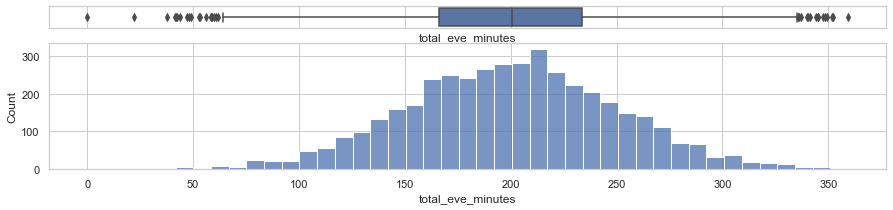

{'no': 199.4, 'yes': 209.9}


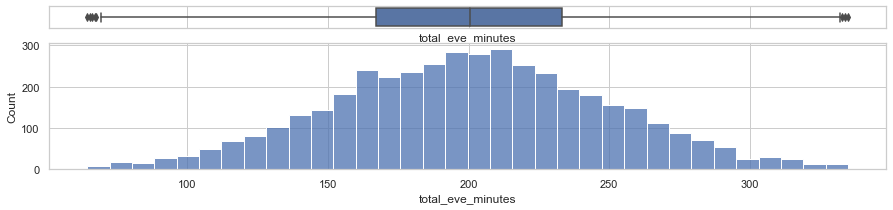

In [130]:
feature = "total_eve_minutes"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [46.5, 154.5]
Lower Outlier Data : 13
[(127, 46), (803, 12), (1066, 45), (1361, 36), (1455, 46), (1567, 44), (2200, 46), (2418, 43), (2482, 0), (2837, 46), (2982, 46), (4028, 38), (4217, 44)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 11
[(249, 168), (856, 157), (896, 155), (1437, 156), (1893, 155), (2645, 155), (2677, 159), (2728, 170), (3332, 169), (3801, 155), (3880, 155)]
['yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']


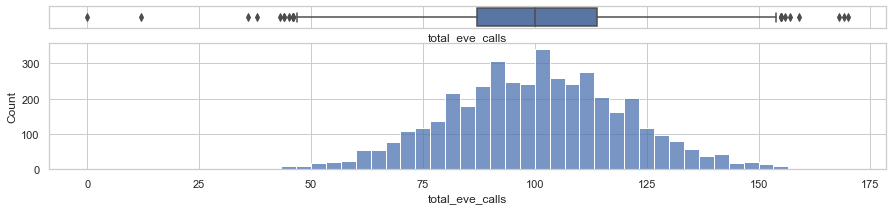

{'no': 100.5, 'yes': 99.0}


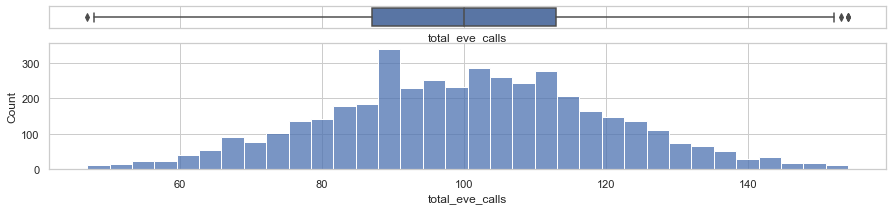

In [131]:
feature = "total_eve_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [5.454999999999998, 28.515]
Lower Outlier Data : 19
[(2, 5.26), (442, 3.59), (486, 5.01), (688, 3.73), (712, 4.5), (744, 3.61), (748, 5.17), (885, 4.98), (997, 4.76), (1036, 4.09), (1129, 5.1), (1661, 4.18), (2482, 0.0), (2859, 1.9), (3213, 4.96), (3377, 3.21), (3384, 3.54), (3707, 4.02), (3717, 4.52)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
Upper Outlier Data : 15
[(4, 29.62), (6, 29.89), (439, 28.65), (479, 29.52), (1075, 28.56), (1838, 28.89), (1986, 28.53), (2602, 29.01), (3345, 29.24), (3524, 29.7), (3854, 29.32), (3873, 29.93), (3924, 29.33), (4157, 30.54), (4244, 28.93)]
['no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes']


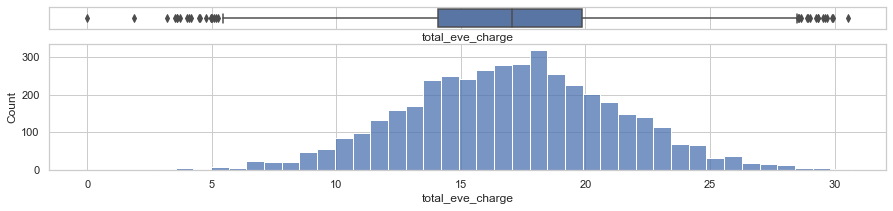

{'no': 16.95, 'yes': 17.84}


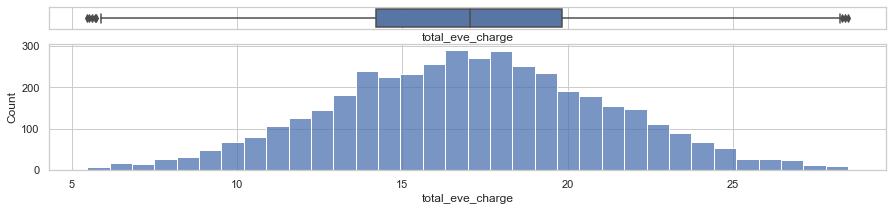

In [132]:
feature = "total_eve_charge"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

In [133]:
num_var

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

Confidence Range : [66.0125, 335.91249999999997]
Lower Outlier Data : 21
[(97, 57.5), (699, 65.8), (739, 45.0), (832, 63.3), (838, 54.5), (897, 50.1), (934, 43.7), (1060, 23.2), (1110, 63.6), (1276, 65.7), (1997, 56.6), (2025, 54.0), (2086, 64.2), (2334, 50.1), (2557, 53.3), (2756, 47.4), (3219, 46.7), (3572, 65.2), (3713, 59.5), (4001, 0.0), (4106, 60.3)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 16
[(369, 349.2), (723, 345.8), (767, 342.8), (1007, 349.7), (1041, 352.5), (1114, 381.9), (1222, 377.5), (1973, 367.7), (2214, 344.3), (2257, 395.0), (2333, 350.2), (2590, 352.2), (2631, 364.9), (2865, 381.6), (3296, 359.9), (4015, 355.1)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no']


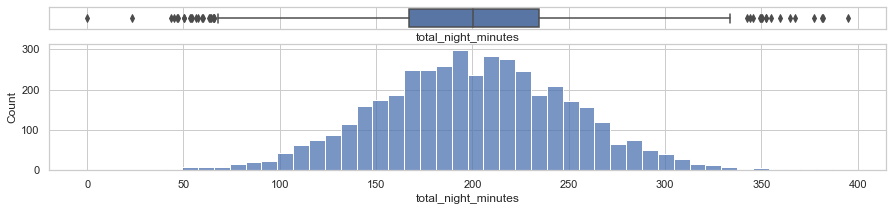

{'no': 199.4, 'yes': 206.3}


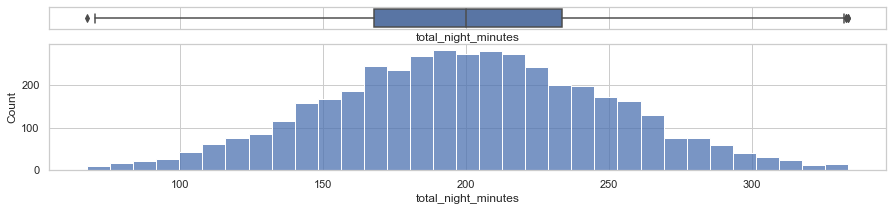

In [134]:
feature = "total_night_minutes"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [45.5, 153.5]
Lower Outlier Data : 13
[(271, 42), (279, 44), (328, 42), (2253, 33), (2458, 38), (2529, 36), (2989, 40), (3457, 42), (3462, 41), (3559, 38), (3716, 42), (3859, 43), (4001, 0)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 20
[(409, 175), (485, 154), (753, 158), (930, 155), (1005, 157), (1094, 157), (2313, 155), (2318, 156), (2689, 156), (2721, 164), (3018, 161), (3185, 159), (3213, 160), (3292, 170), (3316, 158), (3449, 154), (3520, 159), (3680, 155), (3820, 165), (3877, 155)]
['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes']


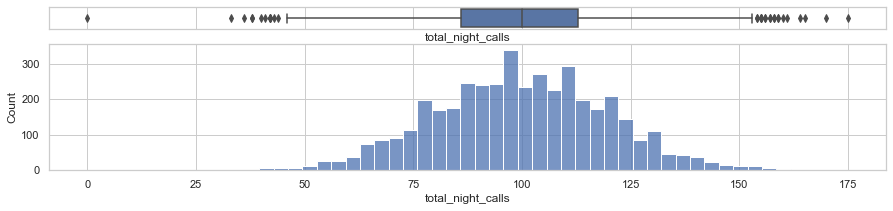

{'no': 100.0, 'yes': 99.0}


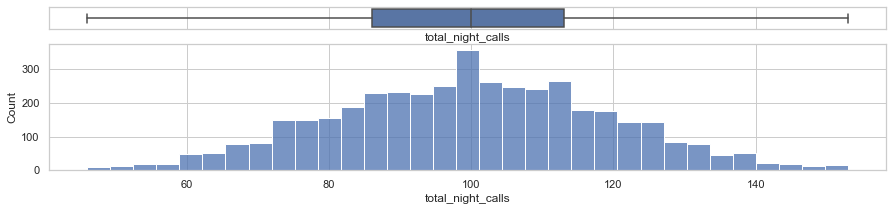

In [135]:
feature = "total_night_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [2.9662499999999996, 15.11625]
Lower Outlier Data : 21
[(97, 2.59), (699, 2.96), (739, 2.03), (832, 2.85), (838, 2.45), (897, 2.25), (934, 1.97), (1060, 1.04), (1110, 2.86), (1276, 2.96), (1997, 2.55), (2025, 2.43), (2086, 2.89), (2334, 2.25), (2557, 2.4), (2756, 2.13), (3219, 2.1), (3572, 2.93), (3713, 2.68), (4001, 0.0), (4106, 2.71)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no']
Upper Outlier Data : 16
[(369, 15.71), (723, 15.56), (767, 15.43), (1007, 15.74), (1041, 15.86), (1114, 17.19), (1222, 16.99), (1973, 16.55), (2214, 15.49), (2257, 17.77), (2333, 15.76), (2590, 15.85), (2631, 16.42), (2865, 17.17), (3296, 16.2), (4015, 15.98)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no']


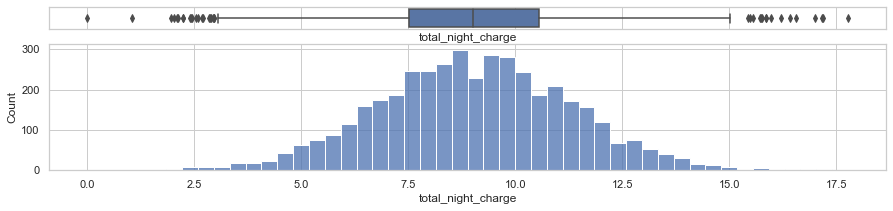

{'no': 8.97, 'yes': 9.28}


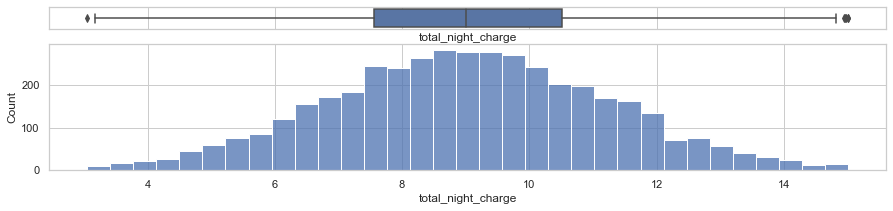

In [136]:
feature = "total_night_charge"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [3.25, 17.25]
Lower Outlier Data : 38
[(146, 0.0), (185, 2.7), (285, 0.0), (405, 0.0), (593, 0.0), (636, 1.3), (735, 0.0), (863, 0.0), (903, 0.0), (920, 2.2), (1186, 0.0), (1317, 0.0), (1666, 2.0), (1854, 2.9), (1920, 2.6), (1993, 0.0), (2007, 0.0), (2136, 0.0), (2263, 1.1), (2316, 0.0), (2461, 0.0), (2470, 0.0), (2483, 2.1), (2555, 2.9), (2679, 2.1), (2725, 2.4), (2743, 2.5), (2780, 0.0), (2792, 0.0), (2886, 0.0), (3090, 0.0), (3288, 0.4), (3476, 2.2), (3703, 0.0), (3768, 0.0), (4192, 0.0), (4204, 1.1), (4209, 2.0)]
['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no']
Upper Outlier Data : 24
[(96, 20.0), (261, 18.9), (304, 18.0), (414, 17.5), (443, 18.2), (1057, 18.0), (1203, 17.9), (1323, 17.3), (1392, 17.3), (1530, 18.4), (1895, 17.6), (1904, 17.3), (2015, 18.2), (2154, 18.0), (2384, 18.3),

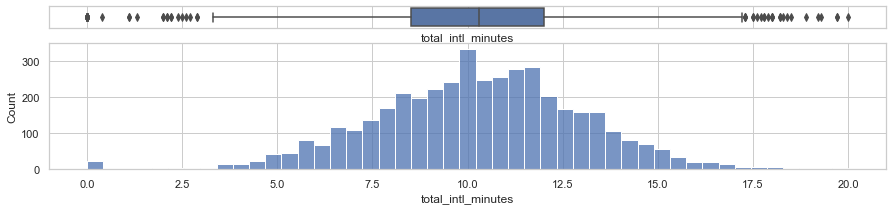

{'no': 10.3, 'yes': 10.5}


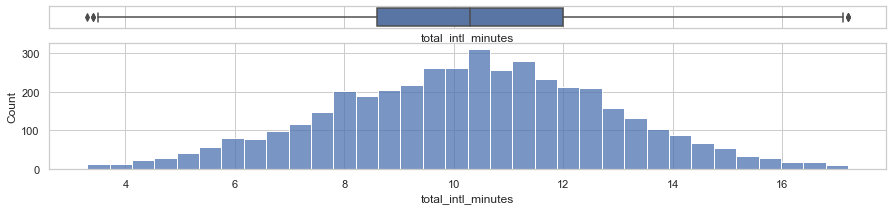

In [137]:
feature = "total_intl_minutes"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [-6.0, 15.0]
Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 14
[(18, 19), (312, 18), (824, 18), (1320, 16), (2222, 16), (2503, 18), (2793, 20), (2810, 17), (2994, 16), (3068, 16), (3091, 16), (3247, 16), (3781, 18), (4249, 16)]
['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no']


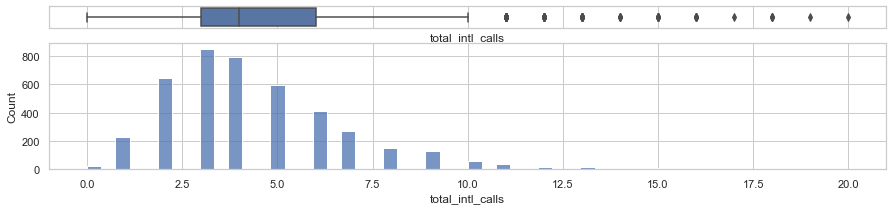

{'no': 4.0, 'yes': 4.0}


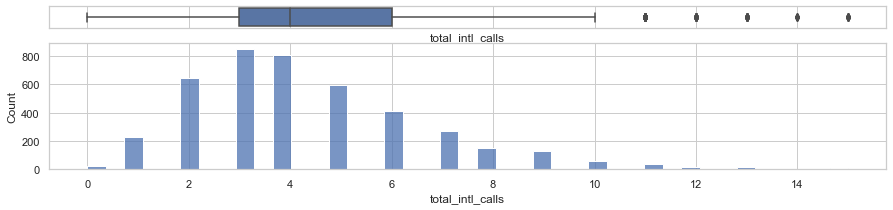

In [138]:
feature = "total_intl_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature, ConfParm=3)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [-0.5200000000000014, 6.060000000000001]
Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 0
[]
[]


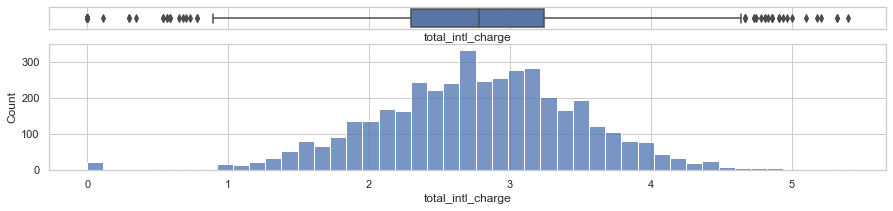

{'no': 2.78, 'yes': 2.86}


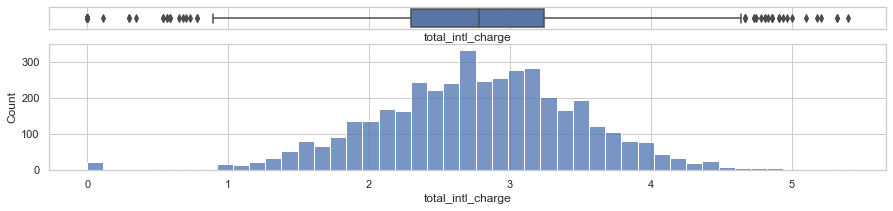

In [139]:
feature = "total_intl_charge"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature, ConfParm=3)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

Confidence Range : [-0.5, 3.5]
Lower Outlier Data : 0
[]
[]
Upper Outlier Data : 335
[(8, 4), (12, 4), (17, 5), (56, 4), (64, 4), (71, 4), (81, 4), (84, 4), (88, 4), (93, 4), (105, 4), (106, 4), (111, 4), (127, 5), (147, 4), (148, 5), (163, 4), (194, 5), (204, 4), (205, 4), (206, 4), (209, 4), (220, 4), (247, 4), (254, 4), (277, 7), (291, 4), (292, 4), (303, 4), (320, 4), (325, 5), (336, 4), (372, 4), (392, 4), (412, 4), (421, 5), (432, 4), (433, 7), (449, 9), (454, 5), (456, 4), (487, 5), (505, 4), (519, 4), (526, 5), (544, 5), (575, 4), (577, 6), (602, 6), (619, 5), (644, 5), (650, 6), (704, 5), (726, 4), (736, 4), (749, 4), (754, 7), (757, 4), (759, 6), (781, 4), (789, 4), (795, 4), (816, 6), (819, 4), (820, 4), (870, 5), (872, 4), (876, 4), (877, 4), (923, 4), (925, 4), (942, 5), (951, 5), (967, 4), (984, 4), (999, 4), (1000, 5), (1003, 4), (1022, 4), (1038, 4), (1043, 4), (1044, 5), (1048, 5), (1062, 4), (1071, 4), (1072, 6), (1081, 4), (1083, 5), (1133, 4), (1138, 4), (1160, 4), 

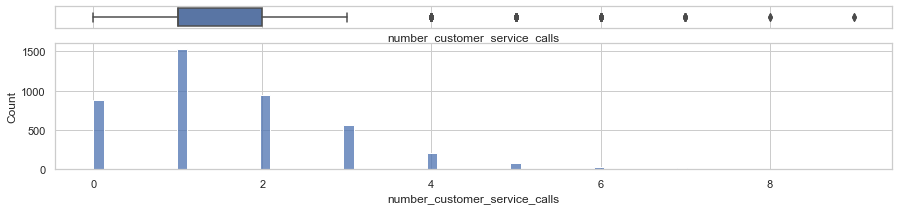

{'no': 1.0, 'yes': 1.0}


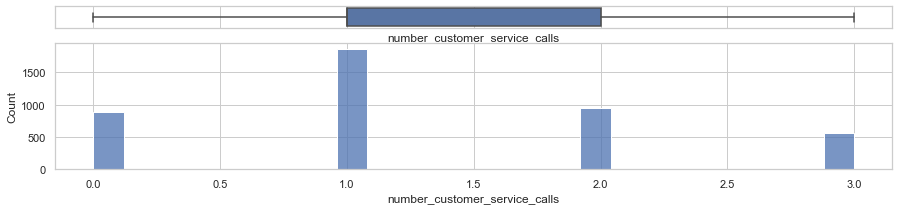

In [140]:
feature = "number_customer_service_calls"
DataNoise = data.copy()
LowerOutlierData, UpperOutlierData, ConfRange = IQR_OutlierDetector(DataNoise, feature)

IQR_OutlierAnalysis(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)
IQR_OutlierVisualization(DataNoise, feature)

data[feature], targetdict = IQR_Impute_Noise(DataNoise, feature, LowerOutlierData, UpperOutlierData, ConfRange, target)

print(targetdict)
train.loc[data.index, feature] = DataNoise[feature]
IQR_OutlierVisualization(DataNoise, feature)

In [141]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26.0,161.6,123,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,NaN,243.4,114,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,NaN,299.4,71,50.90,199.4,88.0,16.95,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,NaN,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24.0,218.2,88,37.09,199.4,108.0,16.95,212.6,118,9.57,7.5,7,2.03,3,no


In [142]:
train["state"].value_counts().shape # 51 states

(51,)

In [143]:
hash_state = ce.HashingEncoder(cols = "state", n_components = 8)
train = hash_state.fit_transform(train)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,no,yes,26.0,161.6,123,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,no,no,NaN,243.4,114,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,yes,no,NaN,299.4,71,50.90,199.4,88.0,16.95,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,yes,no,NaN,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,no,yes,24.0,218.2,88,37.09,199.4,108.0,16.95,212.6,118,9.57,7.5,7,2.03,3,no


In [144]:
train.number_vmail_messages.fillna(0, inplace=True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,no,yes,26.0,161.6,123,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,no,no,0.0,243.4,114,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,yes,no,0.0,299.4,71,50.90,199.4,88.0,16.95,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,yes,no,0.0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,no,yes,24.0,218.2,88,37.09,199.4,108.0,16.95,212.6,118,9.57,7.5,7,2.03,3,no


In [145]:
train["international_plan"].replace(["no", "yes"], [0, 1], inplace = True)
train["voice_mail_plan"].replace(["no", "yes"], [0, 1], inplace = True)
train["churn"].replace(["no", "yes"], [0, 1], inplace = True)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,0,1,26.0,161.6,123,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,1,0,0,0,0,0,0,137,area_code_415,0,0,0.0,243.4,114,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0,0,0,0,1,0,0,0,84,area_code_408,1,0,0.0,299.4,71,50.90,199.4,88.0,16.95,196.9,89,8.86,6.6,7,1.78,2,0
3,0,0,0,0,1,0,0,0,75,area_code_415,1,0,0.0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,0,0,0,1,0,0,0,121,area_code_510,0,1,24.0,218.2,88,37.09,199.4,108.0,16.95,212.6,118,9.57,7.5,7,2.03,3,0


In [146]:
onehot_area = OneHotEncoder()
encode_values = onehot_area.fit_transform(train[['area_code']])
train[onehot_area.categories_[0]] = encode_values.toarray()
train = train.drop("area_code", axis = 1)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,1,26.0,161.6,123,27.47,195.5,103.0,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,0,1,0,0,0,0,0,0,137,0,0,0.0,243.4,114,41.38,121.2,110.0,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,84,1,0,0.0,299.4,71,50.90,199.4,88.0,16.95,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,75,1,0,0.0,166.7,113,28.34,148.3,122.0,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,0,0,0,0,1,0,0,0,121,0,1,24.0,218.2,88,37.09,199.4,108.0,16.95,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0


# Imbalance data 

In [148]:
train['churn'].value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [149]:
X = train.drop("churn", axis = 1).values
y = train["churn"].values

sm = SMOTE(sampling_strategy=1, random_state=1)
X_s, y_s = sm.fit_resample(X, y.ravel())

print(pd.DataFrame(y_s).value_counts())

0    3652
1    3652
dtype: int64


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

((5112, 28), (2192, 28))

In [151]:
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
svc = SVC(kernel = "rbf", decision_function_shape = "ovr")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9092153284671532
[[1049  154]
 [  45  944]]


In [155]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9648722627737226
[[1082   65]
 [  12 1033]]
